<a href="https://colab.research.google.com/github/Dubeyshruti/Data-Analysis-/blob/main/Tourism_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Required dependencies

In [ ]:
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

##Load dataset

In [3]:
df=pd.read_excel("/content/drive/MyDrive/tourism_annotations_full (3).xlsx")

##DATA DESCRIPTION

In [123]:
df

,prolific_id,annotator_id,quad_id,sent_id,review_id,place,country,continent,attraction_type,date,...,sentiment,aspect start index,aspect end index,opinion start index,opinion end index,sentiment index,aspect words,opinion words,sentiment_score,compound_score
0,5edeea354d54cb1a825aa8f9,2,1,727,Champs-6778,Champs,France,Europe,Monument,Jul-01,...,NEG,1,2,3,5,0,2,3,-1,0.0
1,5edeea354d54cb1a825aa8f9,2,2,728,Champs-6778,Champs,France,Europe,Monument,Jul-01,...,NEG,1,3,5,10,0,3,6,-1,0.0
2,5edeea354d54cb1a825aa8f9,2,3,729,Champs-6778,Champs,France,Europe,Monument,Jul-01,...,NEG,1,3,9,15,0,3,7,-1,0.0
3,5edeea354d54cb1a825aa8f9,2,4,730,Champs-6778,Champs,France,Europe,Monument,Jul-01,...,NEG,4,6,6,18,0,3,13,-1,0.0
4,5edeea354d54cb1a825aa8f9,2,5,731,Champs-6778,Champs,France,Europe,Monument,Jul-01,...,NEG,5,7,9,11,0,3,3,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,sroy,28,6104,11726,Rey-1071,Rey,Spain,Europe,Trail,Apr-01,...,POS,7,9,2,3,2,3,2,1,0.0
5987,sroy,28,6105,11729,Rey-1071,Rey,Spain,Europe,Trail,Apr-01,...,POS,9,9,2,4,2,1,3,1,0.0
5988,sroy,28,6106,18311,Serendipity_Beach-285,Serendipity_Beach,Cambodia,Asia,Beach,Oct-16,...,POS,1,1,3,3,2,1,1,1,0.0
5989,sroy,28,6107,14521,Rijksmuseum-130,Rijksmuseum,Netherlands,Europe,Museum,Jun-01,...,POS,2,2,3,3,2,1,1,1,0.0


In [77]:
df.dtypes.count()
df.dtypes

prolific_id            object
annotator_id            int64
quad_id                 int64
sent_id                 int64
review_id              object
place                  object
country                object
continent              object
attraction_type        object
date                   object
covid_era              object
sentence               object
aspect                 object
opinion                object
category               object
sentiment              object
aspect start index      int64
aspect end index        int64
opinion start index     int64
opinion end index       int64
sentiment index         int64
aspect words            int64
opinion words           int64
dtype: object

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5991 entries, 0 to 5990
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   prolific_id          5991 non-null   object
 1   annotator_id         5991 non-null   int64 
 2   quad_id              5991 non-null   int64 
 3   sent_id              5991 non-null   int64 
 4   review_id            5991 non-null   object
 5   place                5991 non-null   object
 6   country              5991 non-null   object
 7   continent            5991 non-null   object
 8   attraction_type      5991 non-null   object
 9   date                 5991 non-null   object
 10  covid_era            5991 non-null   object
 11  sentence             5991 non-null   object
 12  aspect               5991 non-null   object
 13  opinion              5991 non-null   object
 14  category             5991 non-null   object
 15  sentiment            5991 non-null   object
 16  aspect

In [79]:
# Analyzing attraction types - Popular attraction types
popular_attractions = df['attraction_type'].value_counts()
popular_attractions

Water Body       954
National Park    680
Museum           659
Temple           554
Beach            542
Trail            493
Monument         481
Wildlife         317
River            294
Fort             282
Caves            261
Zoo              149
Waterfall        145
Hill Station     142
Church            38
Name: attraction_type, dtype: int64

In [80]:
# Analyzing COVID-era data - Distribution of COVID eras
covid_era_distribution = df['covid_era'].value_counts()
covid_era_distribution

post    4201
pre     1790
Name: covid_era, dtype: int64

In [81]:
# Analyzing sentiment data - Sentiment distribution
sentiment_distribution = df['sentiment'].value_counts()
sentiment_distribution

POS    3476
NEG    1927
NEU     588
Name: sentiment, dtype: int64

In [82]:
sentiment_by_attraction = df.groupby(['attraction_type', 'sentiment'])['sentiment'].count().unstack()
sentiment_by_attraction

sentiment,NEG,NEU,POS
attraction_type,,,
Beach,325,31,186
Caves,37,23,201
Church,3,12,23
Fort,28,47,207
Hill Station,28,16,98
Monument,171,56,254
Museum,203,54,402
National Park,106,66,508
River,143,24,127


In [39]:
df[['aspect','sentence','sentiment','opinion']]

,aspect,sentence,sentiment,opinion
0,DO NOT,PLEASE DO NOT CHANGE YOUR MONEY THERE .,NEG,CHANGE YOUR MONEY
1,went and changed,I went and changed 50 pounds and got exactly 5...,NEG,pounds and got exactly 50 euro
2,when I asked,"And when I asked why , the money changer insis...",NEG,"insisted that it was for "" commission"
3,wonder I have,This is a true wonder I have to agree with all...,NEG,have to agree with all the wonderful comments ...
4,reach them if,Take a touk touk to reach them if you did not ...,NEG,did not come
...,...,...,...,...
5986,great day out,We would totally recommend this for a great da...,POS,totally recommend
5987,trip,You will not be disappointed if you take this ...,POS,not be disappointed
5988,beach,The beach is nice but there is trash everywher...,POS,nice
5989,queues,"There was queues everywhere , for entrance , f...",POS,everywhere


from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
df[['continent','attraction_type']]

,continent,attraction_type
0,Europe,Monument
1,Europe,Monument
2,Europe,Monument
3,Europe,Monument
4,Europe,Monument
...,...,...
5986,Europe,Trail
5987,Europe,Trail
5988,Asia,Beach
5989,Europe,Museum


from matplotlib import pyplot as plt
_df_9['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('continent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('continent')):
  _plot_series(series, series_name, i)
  fig.legend(title='continent', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['continent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='continent', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [47]:
# Descriptive statistics for 'continent' and 'attraction_type'
print(df.groupby('continent')['attraction_type'].value_counts())

continent      attraction_type
Asia           Temple             554
               Beach              542
               Wildlife           317
               River              294
               Fort               282
               Caves              261
               Monument           230
               Waterfall          145
               Hill Station       142
Europe         Museum             659
               Water Body         620
               Trail              493
               Monument           251
               Zoo                149
               Church              38
North America  National Park      680
               Water Body         334
Name: attraction_type, dtype: int64


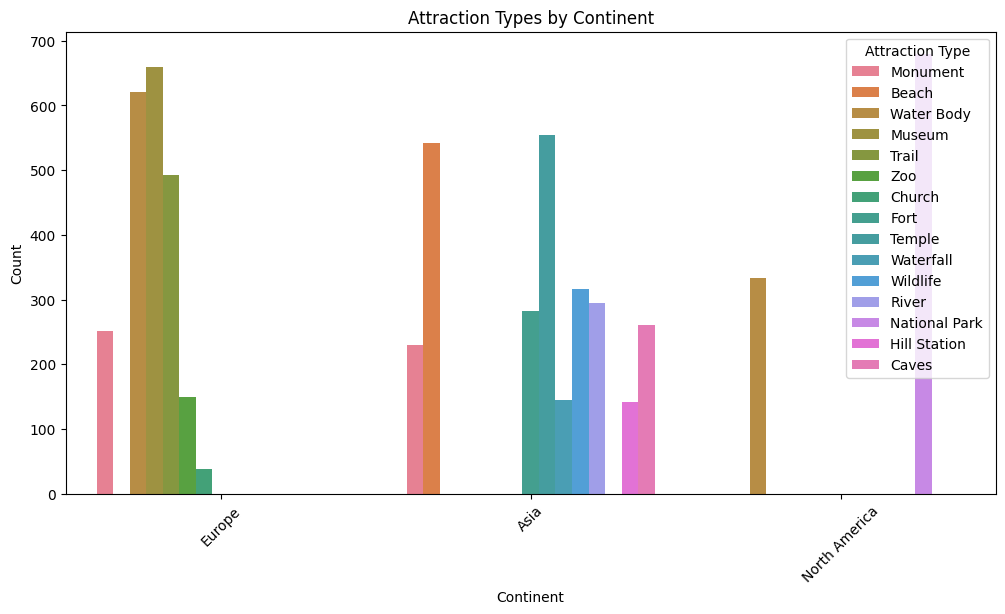

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot to visualize the distribution of attraction types by continent
plt.figure(figsize=(12, 6))
sns.countplot(x='continent', hue='attraction_type', data=df)
plt.title('Attraction Types by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attraction Type')
plt.show()

In [48]:
from scipy.stats import chi2_contingency

# Chi-square test for independence between 'continent' and 'attraction_type'
crosstab = pd.crosstab(df['continent'], df['attraction_type'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 9525.861812912332
P-value: 0.0


<ipython-input-50-28479035d6c2>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


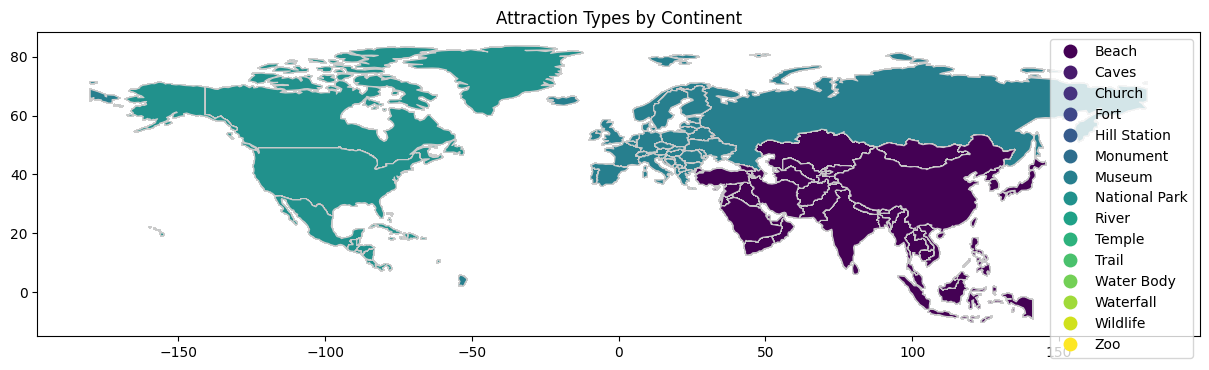

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your data with the world map data
merged = world.merge(df, how='left', left_on='continent', right_on='continent')

# Plot a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='attraction_type', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Attraction Types by Continent')
plt.show()

In [37]:
from IPython.display import display, HTML

unique_country = df['country'].unique()
count = unique_country.size

output = "<div style='border: 2px solid #ff0000; padding: 10px;'><b>No. of countries which are unique are:</b> {} <br><br> <b>namely:</b> {}</div>".format(count, unique_country)
display(HTML(output))

In [34]:
cat=df['category'].unique()
print(cat.size,"\n")
cat

12 



array(['SHOPPING', 'SAFETY', 'MISCELLANEOUS', 'ACCOMMODATION',
       'MAIN-ATTRACTIONS', 'TRANSPORTATION', 'ENTERTAINMENT', 'FOOD',
       'NEARBY-ATTRACTIONS', 'TOUR-COST', 'CULTURE',
       'AMENITIES-AND-SERVICES'], dtype=object)

In [ ]:
df.describe()

,annotator_id,quad_id,sent_id,aspect start index,aspect end index,opinion start index,opinion end index,sentiment index,aspect words,opinion words
count,5991.000000,5991.000000,5991.000000,5991.000000,5991.000000,5991.000000,5991.00000,5991.000000,5991.000000,5991.000000
mean,18.157570,3091.359205,14604.514605,4.618428,5.266900,6.954265,8.78451,1.258554,1.648473,2.830245
std,7.558202,1758.149395,9632.067593,7.155461,7.439979,7.739773,8.33404,0.913861,1.592118,3.012172
min,2.000000,1.000000,6.000000,-1.000000,-1.000000,-1.000000,-1.00000,0.000000,1.000000,1.000000
25%,13.000000,1583.500000,7499.000000,-1.000000,-1.000000,2.000000,3.00000,0.000000,1.000000,1.000000
50%,13.000000,3113.000000,13713.000000,2.000000,3.000000,5.000000,7.00000,2.000000,1.000000,2.000000
75%,28.000000,4610.500000,17496.500000,7.000000,8.000000,10.000000,13.00000,2.000000,2.000000,3.000000
max,29.000000,6108.000000,38920.000000,54.000000,54.000000,62.000000,64.00000,2.000000,37.000000,40.000000


from matplotlib import pyplot as plt
_df_0['annotator_id'].plot(kind='hist', bins=20, title='annotator_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['quad_id'].plot(kind='hist', bins=20, title='quad_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sent_id'].plot(kind='hist', bins=20, title='sent_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['aspect start index'].plot(kind='hist', bins=20, title='aspect start index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='annotator_id', y='quad_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='quad_id', y='sent_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sent_id', y='aspect start index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='aspect start index', y='aspect end index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['annotator_id'].plot(kind='line', figsize=(8, 4), title='annotator_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['quad_id'].plot(kind='line', figsize=(8, 4), title='quad_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['sent_id'].plot(kind='line', figsize=(8, 4), title='sent_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['aspect start index'].plot(kind='line', figsize=(8, 4), title='aspect start index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5986    False
5987    False
5988    False
5989    False
5990    False
Length: 5991, dtype: bool

In [ ]:
df.sent_id.duplicated().sum()

2058

In [56]:
df[['date','covid_era']]

,date,covid_era
0,Jul-01,post
1,Jul-01,post
2,Jul-01,post
3,Jul-01,post
4,Jul-01,post
...,...,...
5986,Apr-01,post
5987,Apr-01,post
5988,Oct-16,post
5989,Jun-01,pre


from matplotlib import pyplot as plt
_df_14['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('covid_era').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('covid_era')):
  _plot_series(series, series_name, i)
  fig.legend(title='covid_era', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('covid_era')):
  _plot_series(series, series_name, i)
  fig.legend(title='covid_era', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_18['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['covid_era'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='covid_era', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

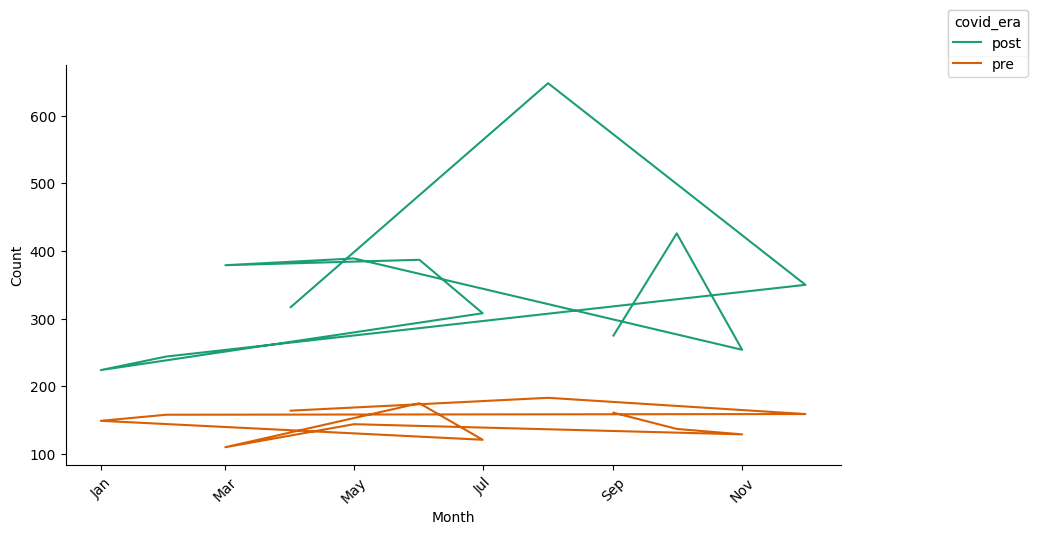

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    counted = (series['date']
                   .apply(lambda x: x.split('-')[0])  # Extract month from date
                   .value_counts()
                   .reset_index(name='counts')
                   .rename({'index': 'month'}, axis=1)
                   .sort_values('month', ascending=True))
    xs = pd.to_datetime(counted['month'], format='%b')  # Convert month to datetime format
    ys = counted['counts']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2))
df_sorted = _df_17.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('covid_era')):
    _plot_series(series, series_name, i)
    fig.legend(title='covid_era', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
plt.ylabel('Count')

# Customize date formatting on x-axis for month representation
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))

plt.show()

In [70]:
print(df.groupby(['covid_era','date']))

In [93]:
# Analyze the distribution of attraction types by country
attraction_by_country = df.groupby(['country', 'attraction_type']).size().unstack(fill_value=0)

# Analyze the distribution of attraction types by continent
attraction_by_continent = df.groupby(['continent', 'attraction_type']).size().unstack(fill_value=0)

# Display the results
print("Attraction types by country:")
print(attraction_by_country.head())

print("\nAttraction types by continent:")
print(attraction_by_continent.head())

Attraction types by country:
attraction_type  Beach  Caves  Church  Fort  Hill Station  Monument  Museum  \
country                                                                       
Cambodia           332      0       0     0             0         0       0   
Czech Republic       0      0       0     0             0         0       0   
England              0      0       0     0             0         0       0   
France               0      0       0     0             0       251     201   
India                0    261       0   282           142       230       0   

attraction_type  National Park  River  Temple  Trail  Water Body  Waterfall  \
country                                                                       
Cambodia                     0      0       0      0           0          0   
Czech Republic               0      0       0      0           0          0   
England                      0      0       0      0         416          0   
France                

##SIZE OF SENTENCE

In [55]:
sentences = df["sentence"]
sentences

0                 PLEASE DO NOT CHANGE YOUR MONEY THERE .
1       I went and changed 50 pounds and got exactly 5...
2       And when I asked why , the money changer insis...
3       This is a true wonder I have to agree with all...
4       Take a touk touk to reach them if you did not ...
                              ...                        
5986    We would totally recommend this for a great da...
5987    You will not be disappointed if you take this ...
5988    The beach is nice but there is trash everywher...
5989    There was queues everywhere , for entrance , f...
5990    This made me realise art museums are not my ki...
Name: sentence, Length: 5991, dtype: object

In [ ]:
# Since sentences contains lists of words, access elements within each list for length:
print("Number of sentences:", len(sentences))
print("Average sentence length (words per sentence):", sentences.apply(len).mean())

#For individual word analysis, flatten the list:
from itertools import chain
all_words = chain.from_iterable(sentences)  # Flattens the list of lists

vocabulary_size = len(set(all_words))
print("Vocabulary size:", vocabulary_size)


Number of sentences: 5991
Average sentence length (words per sentence): 94.72008012018027
Vocabulary size: 105


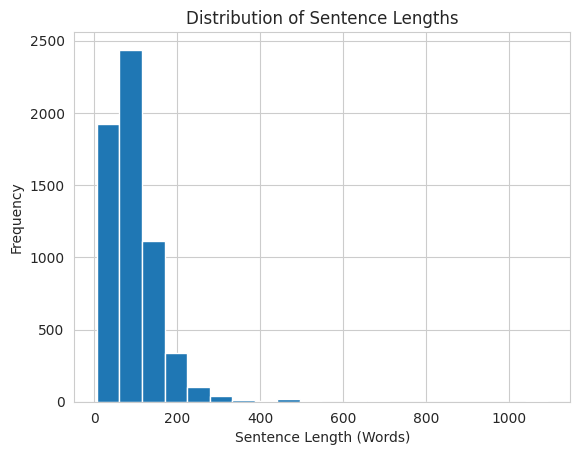

In [ ]:
import matplotlib.pyplot as plt

sentences.apply(len).hist(bins=20)  # Adjust bin size as needed
plt.xlabel("Sentence Length (Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()

##MISSING VALUES DETAILS

In [ ]:
df.isnull().sum()

prolific_id            0
annotator_id           0
quad_id                0
sent_id                0
review_id              0
place                  0
country                0
continent              0
attraction_type        0
date                   0
covid_era              0
sentence               0
aspect                 0
opinion                0
category               0
sentiment              0
aspect start index     0
aspect end index       0
opinion start index    0
opinion end index      0
sentiment index        0
aspect words           0
opinion words          0
dtype: int64

In [ ]:
df.isna().sum()

prolific_id            0
annotator_id           0
quad_id                0
sent_id                0
review_id              0
place                  0
country                0
continent              0
attraction_type        0
date                   0
covid_era              0
sentence               0
aspect                 0
opinion                0
category               0
sentiment              0
aspect start index     0
aspect end index       0
opinion start index    0
opinion end index      0
sentiment index        0
aspect words           0
opinion words          0
dtype: int64

##SENTENCE ANALYSIS

In [ ]:
def sentence_analysis(df, bin_size, title, file_name=None):
    data_len = df['sentence'].apply(len)

    min_len = np.min(data_len)
    max_len = np.max(data_len)
    avg_len = np.round(np.mean(data_len), 2)
    num_bins = int((max(data_len) - min(data_len)) / bin_size)

    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(data_len, bins=num_bins, color='skyblue', kde=False, alpha=0.8)
    ax.set(xlabel='Number of Words', ylabel='Frequency')
    ax.set_title(title, fontsize=14)
    plt.axvline(x=avg_len, color='red', linestyle='--', label='Average Length')
    plt.legend()
    if file_name:
        plt.savefig(file_name, dpi=300, bbox_inches='tight')

    plt.show()
    print(f"Min: {min_len}, Max: {max_len}, Avg: {avg_len}")

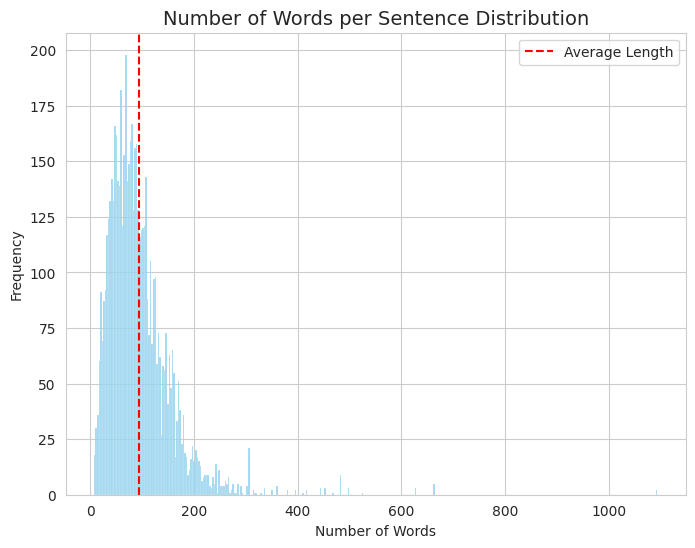

Min: 7, Max: 1094, Avg: 94.72


In [ ]:
sentence_analysis(df, 3, "Number of Words per Sentence Distribution", "data-1.png")


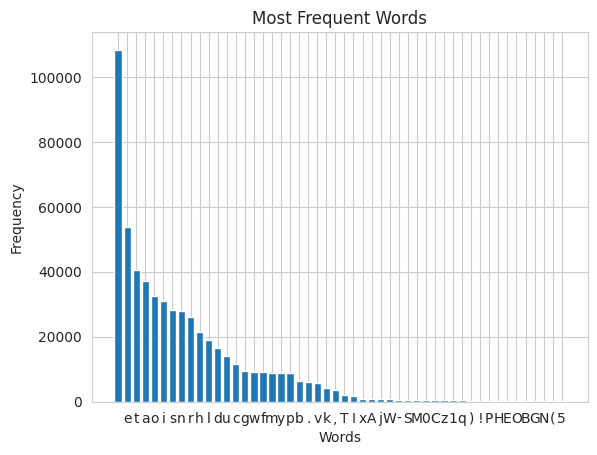

In [ ]:
from collections import Counter

all_words = []
for sent in df['sentence']:
    all_words.extend(sent)

# Count word frequencies
word_counts = Counter(all_words)

# Create a bar chart
plt.bar([word for word, count in word_counts.most_common(50)], [count for word, count in word_counts.most_common(50)])  # Adjust number of words
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Frequent Words")
plt.show()


##QUAD ANALYSIS

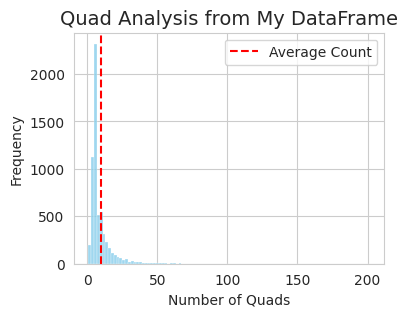

Min: 1, Max: 202, Avg:9.73, Total: 58275


In [ ]:

def quad_analysis_df(df, aspect, bin_size=1, title="Number of Quads per Sentence Distribution", file_name=None):
    """
    Performs quad analysis on a DataFrame and creates a histogram.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        aspect (str): The name of the column containing the aspects (lists of quads).
        bin_size (int, optional): The bin size for the histogram. Defaults to 1.
        title (str, optional): The title of the plot. Defaults to "Number of Quads per Sentence Distribution".
        file_name (str, optional): The filename to save the plot. Defaults to None.
    """

    data_len = df[aspect].apply(len)  # Get aspect lengths directly from DataFrame

    min_len = np.min(data_len)
    max_len = np.max(data_len)
    total = np.sum(data_len)
    avg_len = np.round(np.mean(data_len), 2)
    num_bins = int((max_len - min_len) / bin_size)

    sns.set_style("whitegrid")
    plt.figure(figsize=(4, 3))
    ax = sns.histplot(data_len, bins=num_bins, color='skyblue', kde=False, alpha=0.8)
    ax.set(xlabel='Number of Quads', ylabel='Frequency')
    if title:
        ax.set_title(title, fontsize=14)
    plt.axvline(x=avg_len, color='red', linestyle='--', label='Average Count')
    plt.legend()
    if file_name:
        plt.savefig(file_name, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Min: {min_len}, Max: {max_len}, Avg:{avg_len}, Total: {total}")

# Example usage with your DataFrame (assuming you corrected the column name):
quad_analysis_df(df, "aspect", bin_size=2, title="Quad Analysis from My DataFrame", file_name="my_data_quads.png")


##ANALYSIS


Analyzing column: prolific_id
count                         5991
unique                          17
top       55b95e2ffdf99b469f622883
freq                          2210
Name: prolific_id, dtype: object


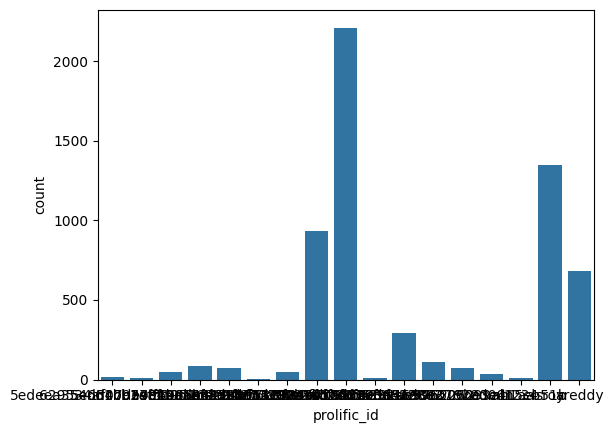


Analyzing column: annotator_id
count    5991.000000
mean       18.157570
std         7.558202
min         2.000000
25%        13.000000
50%        13.000000
75%        28.000000
max        29.000000
Name: annotator_id, dtype: float64


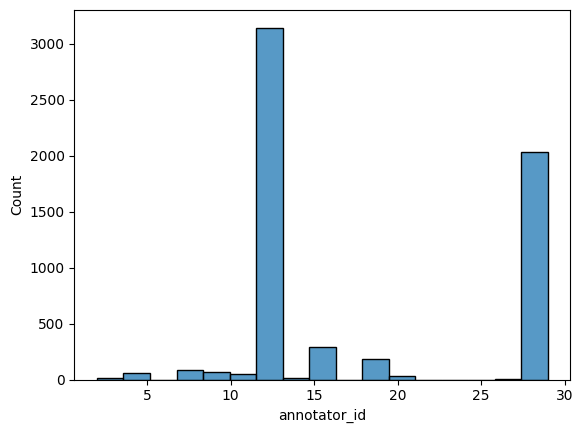


Analyzing column: quad_id
count    5991.000000
mean     3091.359205
std      1758.149395
min         1.000000
25%      1583.500000
50%      3113.000000
75%      4610.500000
max      6108.000000
Name: quad_id, dtype: float64


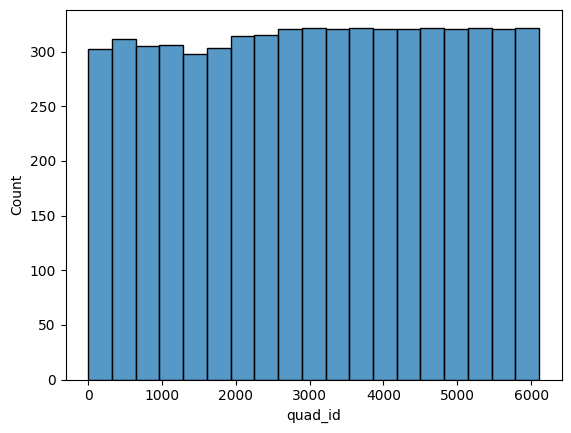


Analyzing column: sent_id
count     5991.000000
mean     14604.514605
std       9632.067593
min          6.000000
25%       7499.000000
50%      13713.000000
75%      17496.500000
max      38920.000000
Name: sent_id, dtype: float64


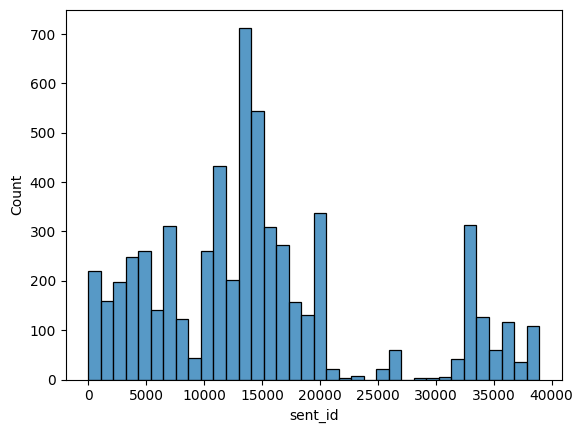


Analyzing column: review_id
count          5991
unique          902
top       Beach-250
freq             56
Name: review_id, dtype: object


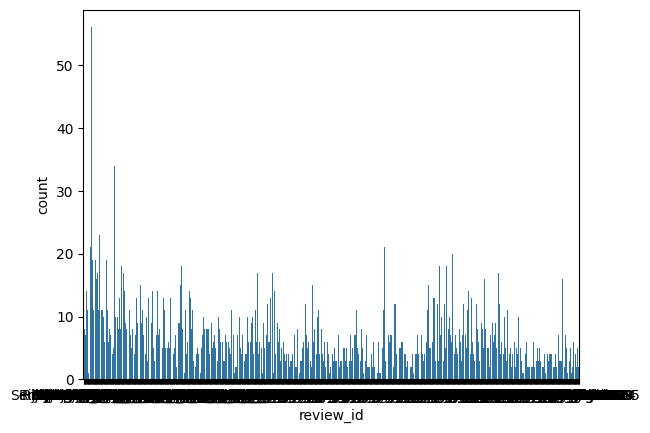


Analyzing column: place
count     5991
unique      22
top        Rey
freq       493
Name: place, dtype: object


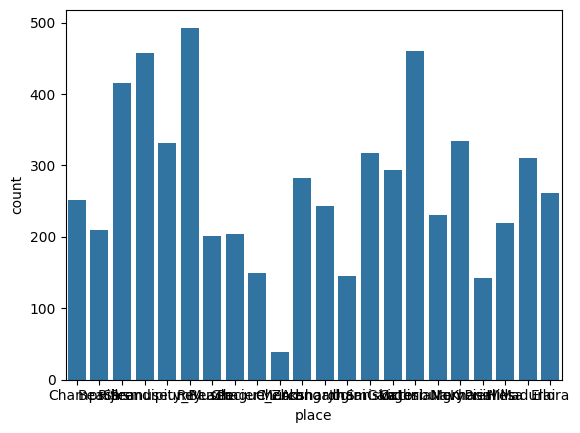


Analyzing column: country
count      5991
unique       11
top       India
freq       2225
Name: country, dtype: object


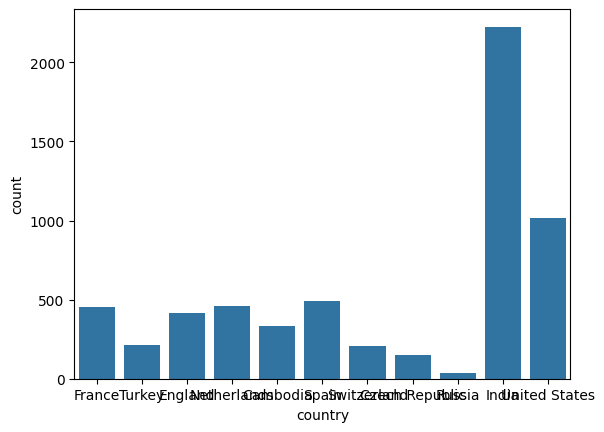


Analyzing column: continent
count     5991
unique       3
top       Asia
freq      2767
Name: continent, dtype: object


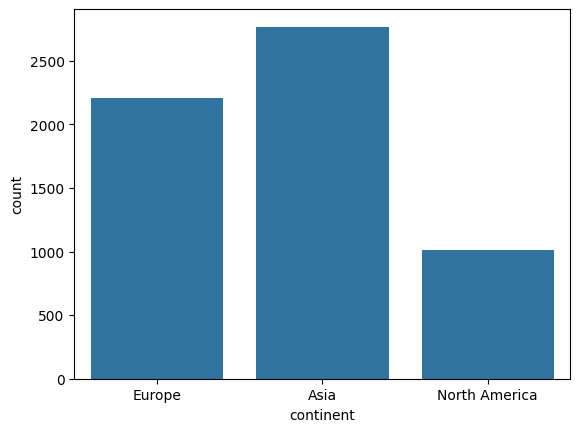


Analyzing column: attraction_type
count           5991
unique            15
top       Water Body
freq             954
Name: attraction_type, dtype: object


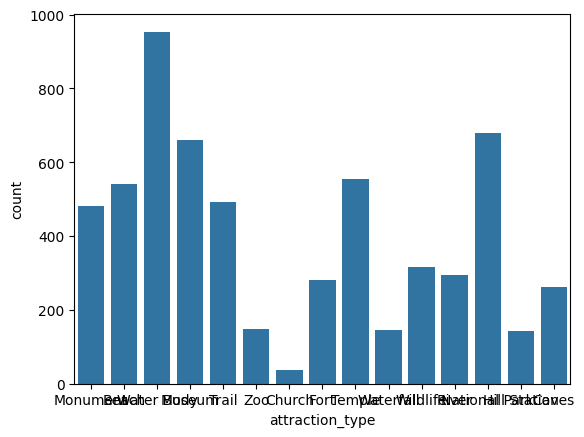


Analyzing column: date
count       5991
unique        84
top       Apr-01
freq         481
Name: date, dtype: object


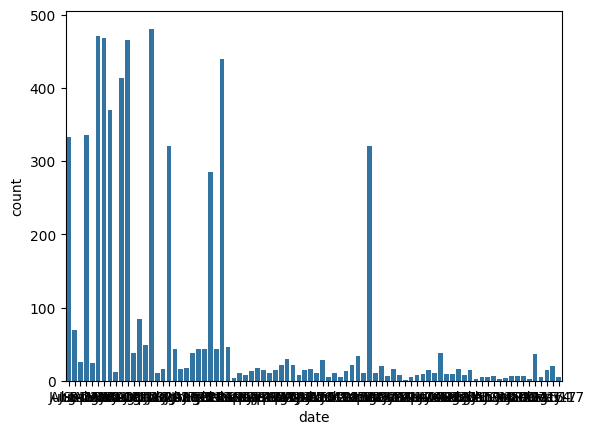


Analyzing column: covid_era
count     5991
unique       2
top       post
freq      4201
Name: covid_era, dtype: object


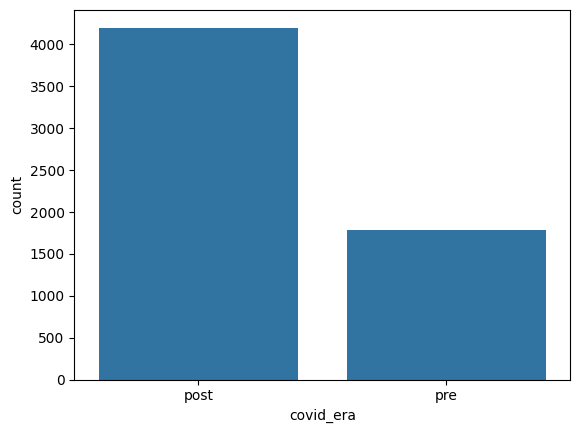


Analyzing column: sentence
count                                                  5991
unique                                                 3923
top       All in all Alanya is a thriving busy seaside t...
freq                                                     17
Name: sentence, dtype: object


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


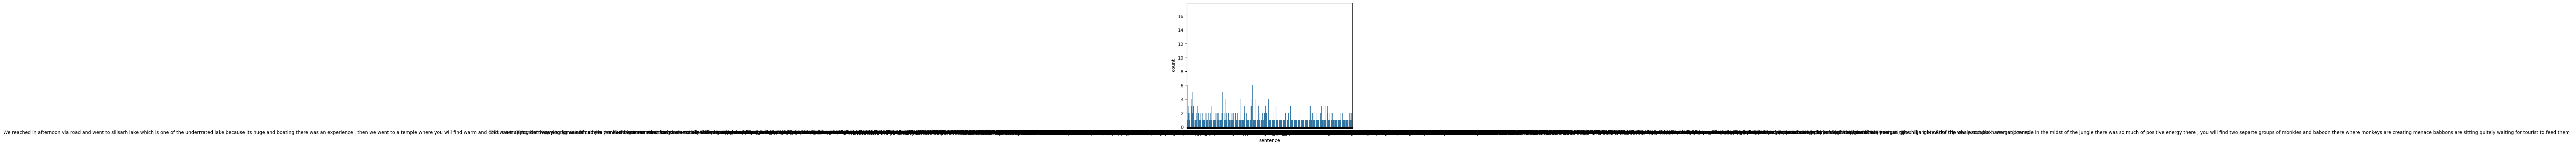


Analyzing column: aspect
count        5991
unique       2244
top       IMPLICT
freq         1554
Name: aspect, dtype: object


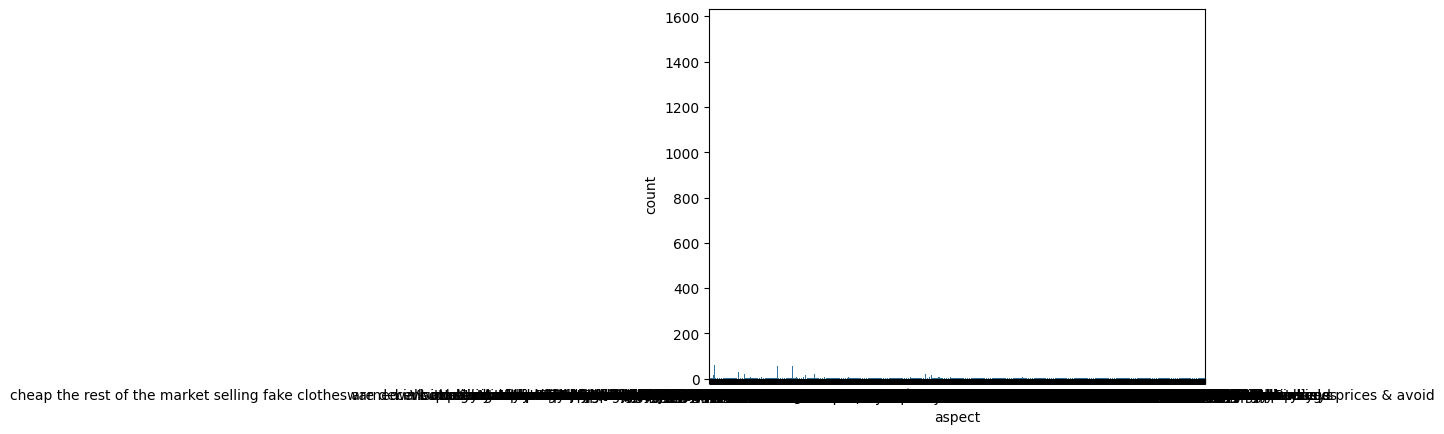


Analyzing column: opinion
count        5991
unique       3902
top       IMPLICT
freq          478
Name: opinion, dtype: object


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


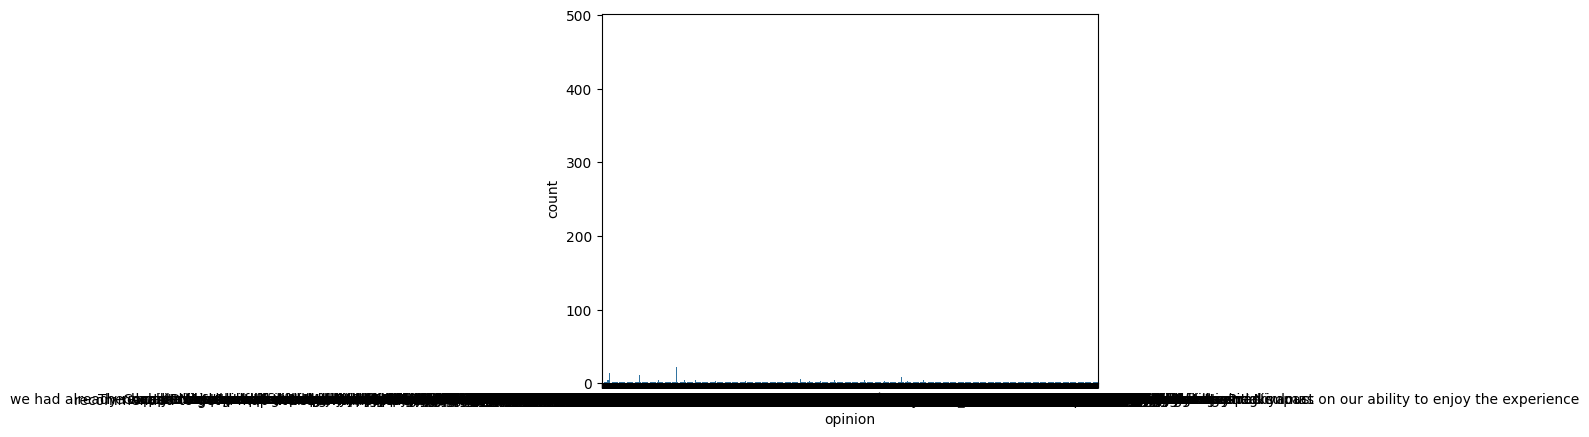


Analyzing column: category
count                 5991
unique                  12
top       MAIN-ATTRACTIONS
freq                  3091
Name: category, dtype: object


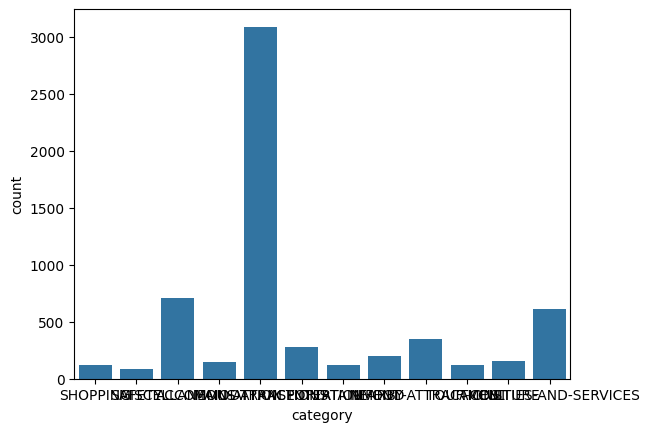


Analyzing column: sentiment
count     5991
unique       3
top        POS
freq      3476
Name: sentiment, dtype: object


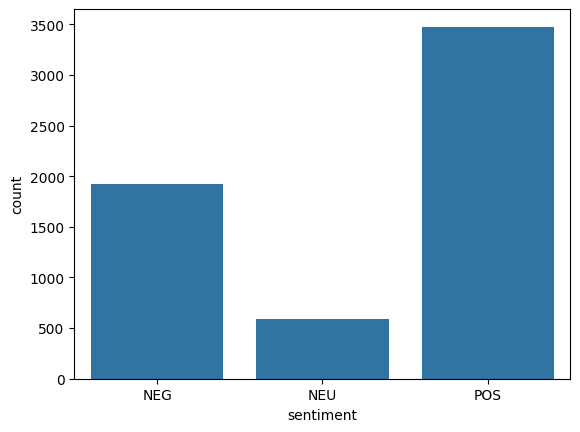


Analyzing column: aspect start index
count    5991.000000
mean        4.618428
std         7.155461
min        -1.000000
25%        -1.000000
50%         2.000000
75%         7.000000
max        54.000000
Name: aspect start index, dtype: float64


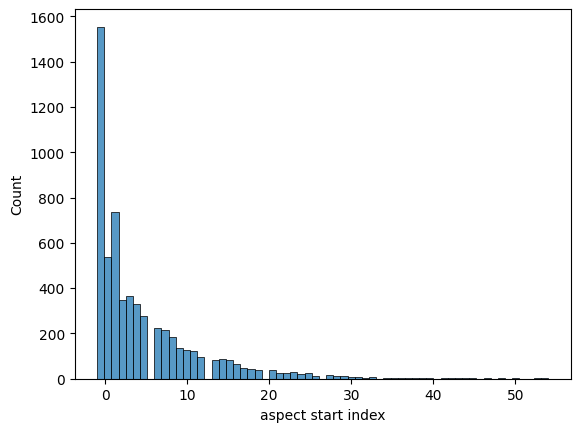


Analyzing column: aspect end index
count    5991.000000
mean        5.266900
std         7.439979
min        -1.000000
25%        -1.000000
50%         3.000000
75%         8.000000
max        54.000000
Name: aspect end index, dtype: float64


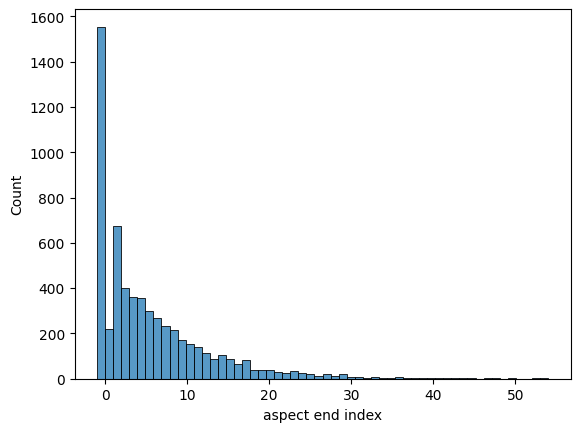


Analyzing column: opinion start index
count    5991.000000
mean        6.954265
std         7.739773
min        -1.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        62.000000
Name: opinion start index, dtype: float64


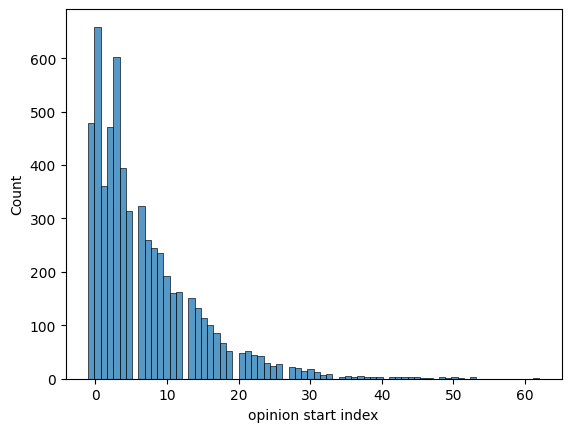


Analyzing column: opinion end index
count    5991.00000
mean        8.78451
std         8.33404
min        -1.00000
25%         3.00000
50%         7.00000
75%        13.00000
max        64.00000
Name: opinion end index, dtype: float64


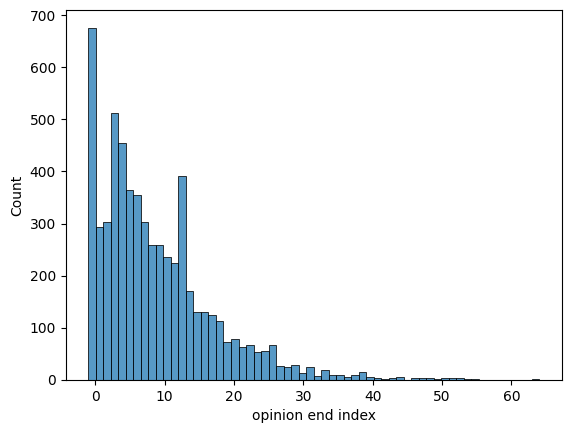


Analyzing column: sentiment index
count    5991.000000
mean        1.258554
std         0.913861
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: sentiment index, dtype: float64


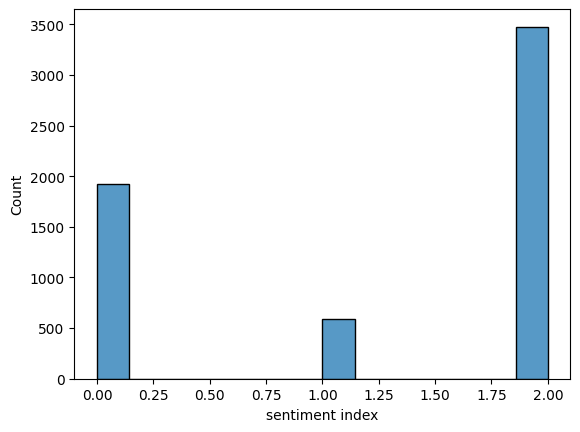


Analyzing column: aspect words
count    5991.000000
mean        1.648473
std         1.592118
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        37.000000
Name: aspect words, dtype: float64


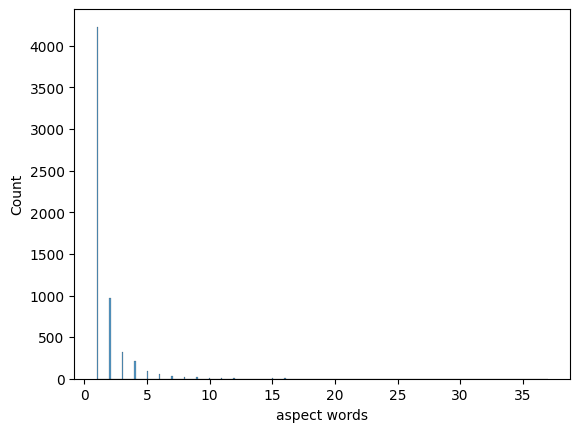


Analyzing column: opinion words
count    5991.000000
mean        2.830245
std         3.012172
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        40.000000
Name: opinion words, dtype: float64


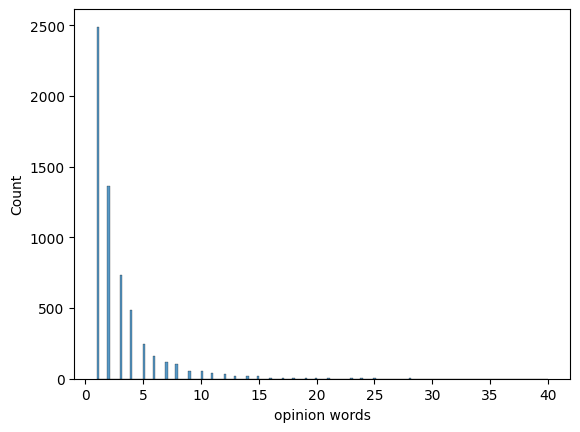

In [ ]:

for col in df.columns:
    print(f"\nAnalyzing column: {col}")

    # Descriptive statistics
    print(df[col].describe())

    # Check data types and handle missing values if necessary
    if pd.api.types.is_numeric_dtype(df[col]):
        # Perform numerical analysis (e.g., correlations, distributions)
        sns.histplot(df[col])
        plt.show()
    else:
        # Perform categorical analysis (e.g., value counts, crosstabulations)
        sns.countplot(x=col, data=df)
        plt.show()




##OPINION ANALYSIS

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

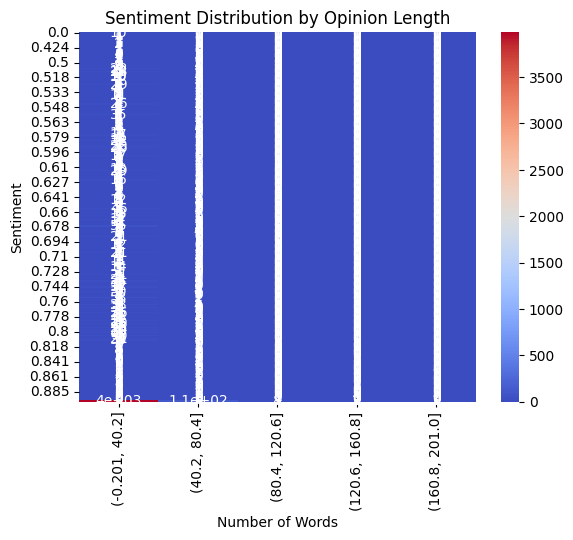

In [ ]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer


def sentiment_analysis(opinion):
    """Analyzes sentiment of an opinion using VADER."""
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(opinion)
    return max(score['pos'], score['neg'], score['neu'])

# Add sentiment scores to each opinion
df['sentiment'] = df['opinion'].apply(sentiment_analysis)

# Group opinions by length and sentiment
length_sentiment_counts = df.groupby(['sentiment', pd.cut(df['opinion'].str.len(), bins=5)])['opinion'].count().unstack(fill_value=0)

# Visualize as heatmap
import seaborn as sns
sns.heatmap(length_sentiment_counts, annot=True, cmap='coolwarm')
plt.title('Sentiment Distribution by Opinion Length')
plt.xlabel('Number of Words')
plt.ylabel('Sentiment')
plt.show()



##covidera description

In [ ]:
# Group data by covid_era
grouped_data = df.groupby("covid_era")

# Descriptive statistics for numerical columns
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"\nDescriptive statistics for {col} by covid_era:")
        print(grouped_data[col].describe())



Descriptive statistics for annotator_id by covid_era:
            count       mean       std  min   25%   50%   75%   max
covid_era                                                          
post       4201.0  17.776958  7.489072  2.0  13.0  13.0  28.0  29.0
pre        1790.0  19.050838  7.646039  4.0  13.0  13.0  28.0  29.0

Descriptive statistics for quad_id by covid_era:
            count         mean          std   min      25%     50%      75%  \
covid_era                                                                     
post       4201.0  2959.833373  1785.809111   1.0  1419.00  2814.0  4538.00   
pre        1790.0  3400.040782  1651.280157  24.0  2380.25  3608.5  4774.25   

              max  
covid_era          
post       6106.0  
pre        6108.0  

Descriptive statistics for sent_id by covid_era:
            count          mean           std    min      25%      50%  \
covid_era                                                                
post       4201.0  14117.835

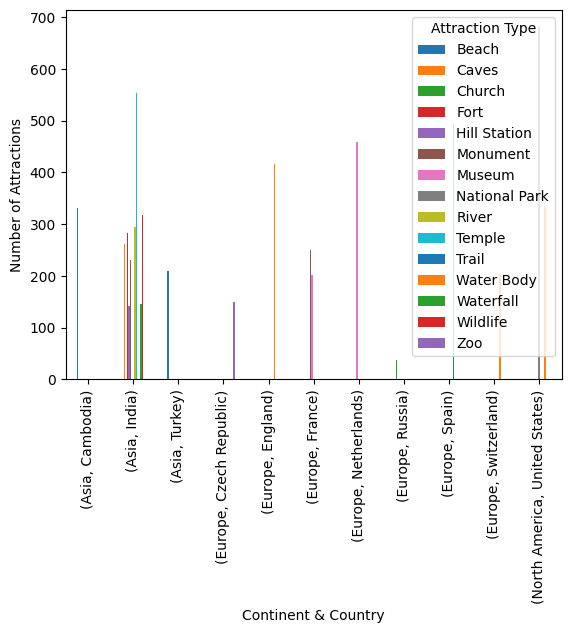

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by continent, country, and attraction_type
grouped_data = df.groupby(["continent", "country", "attraction_type"]).size().unstack(
    fill_value=0
)

# Create a bar chart (adjust layout and colors as needed)
grouped_data.plot(kind="bar", stacked=False)
plt.xlabel("Continent & Country")
plt.ylabel("Number of Attractions")
plt.legend(title="Attraction Type")
plt.show()


##Spot The best tourist attraction type

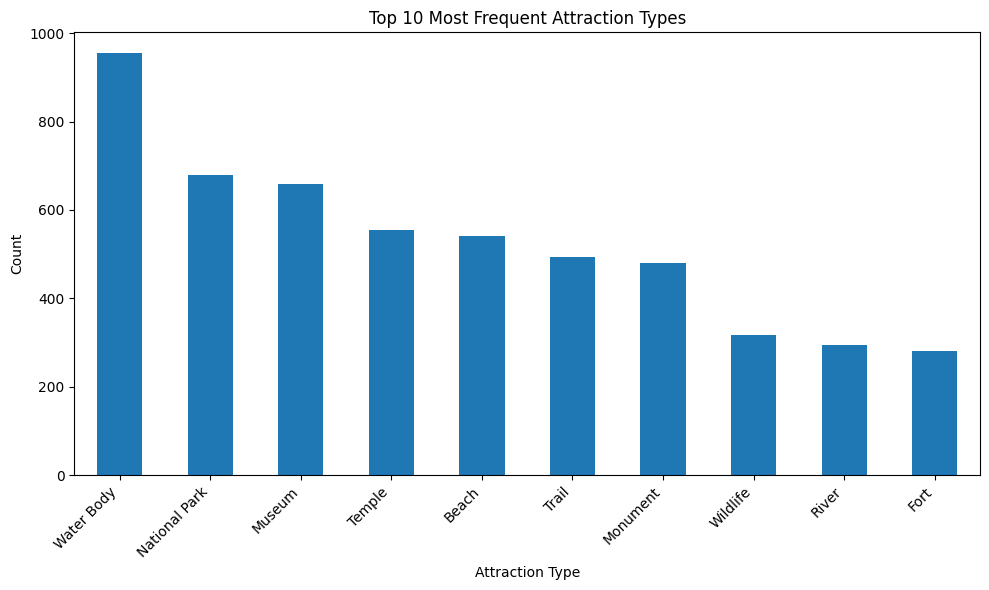

In [ ]:
# Define "best" (e.g., most frequent)
best_attractions = grouped_data.sum(axis=0).sort_values(ascending=False)[:10]

# Bar chart
plt.figure(figsize=(10, 6))
best_attractions.plot(kind="bar", colormap="tab20")
plt.title("Top 10 Most Frequent Attraction Types")
plt.xlabel("Attraction Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



##Attraction of tourist by country and continent

In [ ]:
# Lowercase and remove punctuation (adjust as needed)
df["aspect"] = df["aspect"].str.lower().str.replace("[^\w\s]", "")
df["opinion"] = df["opinion"].str.lower().str.replace("[^\w\s]", "")
df["sentiment"] = df["sentiment"].str.lower()

<ipython-input-15-ecb41ed32318>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["aspect"] = df["aspect"].str.lower().str.replace("[^\w\s]", "")
<ipython-input-15-ecb41ed32318>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["opinion"] = df["opinion"].str.lower().str.replace("[^\w\s]", "")


Most frequent aspects:
implict       1554
place          112
museum          72
temple          66
it              65
guide           64
beach           62
park            59
experience      58
views           44
Name: aspect, dtype: int64


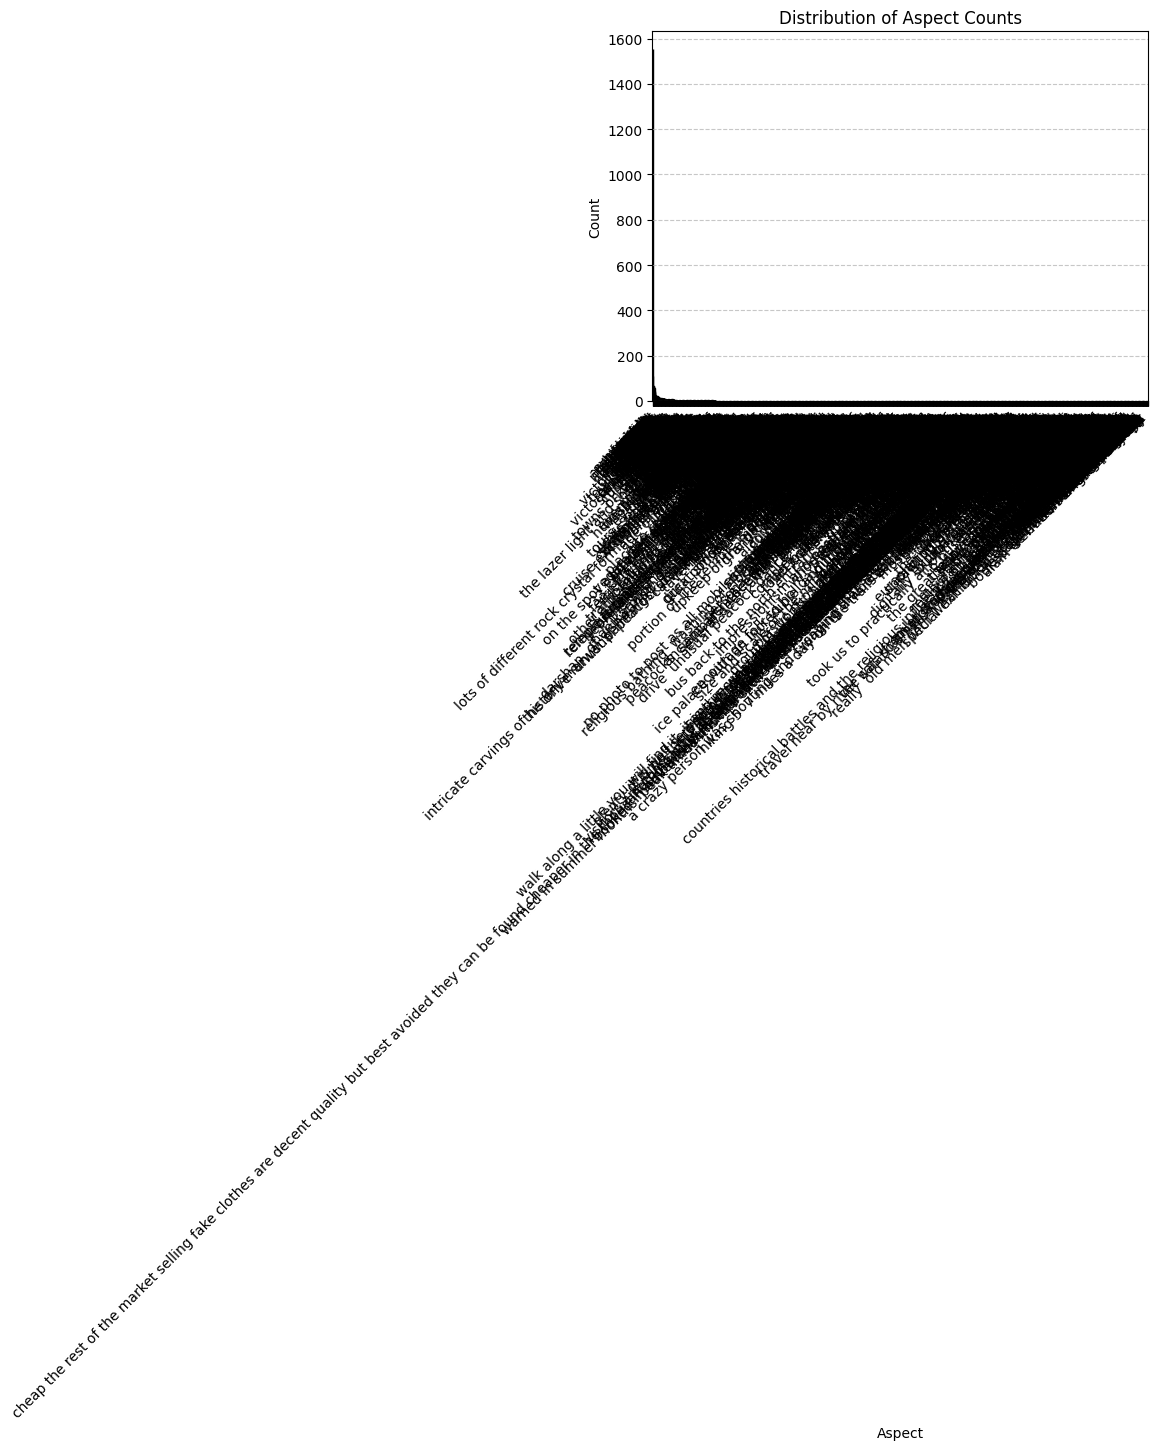

In [ ]:
aspect_counts = df["aspect"].value_counts()
print("Most frequent aspects:")
print(aspect_counts.head(10))
import matplotlib.pyplot as plt

# Use the provided information to create the bar chart
aspect_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.title('Distribution of Aspect Counts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
sentiment_counts = df["sentiment"].value_counts()
print("Sentiment distribution:")
print(sentiment_counts)


Sentiment distribution:
pos    3476
neg    1927
neu     588
Name: sentiment, dtype: int64


In [ ]:
from collections import Counter

# Tokenize opinions (adjust stopwords and stemming as needed)
stopwords = set(stopwords.words("english"))
opinions_tokenized = []
for opinion in df["opinion"]:
    tokens = [word.lower() for word in opinion.split() if word not in stopwords]
    opinions_tokenized.append(tokens)

# Find frequent words and bigrams
opinion_word_counts = Counter(word for token_list in opinions_tokenized for word in token_list)
opinion_bigram_counts = Counter(tuple(pair) for token_list in opinions_tokenized for pair in zip(token_list, token_list[1:]))

print("Most frequent opinion words:")
print(opinion_word_counts.most_common(10))
print("Most frequent opinion bigrams:")
print(opinion_bigram_counts.most_common(10))


Most frequent opinion words:
[('implict', 478), ('beautiful', 173), ('great', 148), ('worth', 140), ('amazing', 126), ('good', 124), ('nice', 109), ('well', 97), ('see', 85), ('visit', 82)]
Most frequent opinion bigrams:
[(('worth', 'visit'), 30), (('well', 'worth'), 29), (('must', 'see'), 22), (('well', 'maintained'), 19), (('highly', 'recommend'), 17), (('must', 'visit'), 13), (('much', 'see'), 11), (('much', 'better'), 9), (('worth', 'time'), 9), (('easy', 'get'), 8)]


In [ ]:
import pandas as pd
from plotly.express import scatter

df_scatter = pd.DataFrame({"aspect": aspect_counts.index, "count": aspect_counts.values})
fig = scatter(df_scatter, x="aspect", y="count", size="count", color="count")
fig.update_layout(title="Interactive Aspect Scatter Plot")
fig.show()


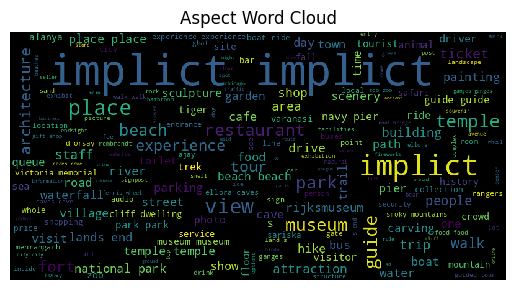

In [ ]:
# Word cloud for aspects
wordcloud = WordCloud(width=800, height=400).generate(" ".join(df["aspect"]))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis("off")
plt.title("Aspect Word Cloud")
plt.show()

##Sentiment distribution pie chart


Which place in which country has what kind of sentiment

<Figure size 1200x800 with 0 Axes>

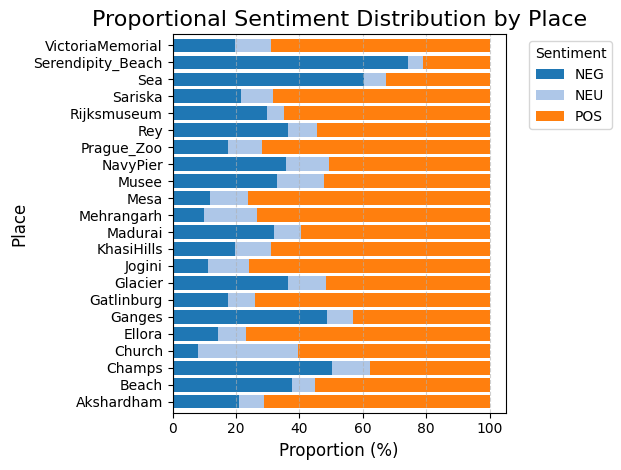

In [109]:
import matplotlib.pyplot as plt

# Calculate sentiment proportions by place
sentiment_by_place = df.groupby(['place', 'sentiment']).size().unstack(fill_value=0)
sentiment_proportions = sentiment_by_place.div(sentiment_by_place.sum(axis=1), axis=0) * 100

# Visualize as a horizontal stacked bar chart with a larger figure size and color palette
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20.colors  # Using a different color palette for better differentiation
sentiment_proportions.plot(kind='barh', stacked=True, color=colors, width=0.8)
plt.title('Proportional Sentiment Distribution by Place', fontsize=16)
plt.xlabel('Proportion (%)', fontsize=12)
plt.ylabel('Place', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## ABOUT **INDIA**

In [96]:
india_data = df[df['country'] == 'India']
india_data

,prolific_id,annotator_id,quad_id,sent_id,review_id,place,country,continent,attraction_type,date,...,opinion,category,sentiment,aspect start index,aspect end index,opinion start index,opinion end index,sentiment index,aspect words,opinion words
2381,admin,20,2499,10786,Mehrangarh-10,Mehrangarh,India,Asia,Fort,Mar-01,...,dominates Jodhpur,MAIN-ATTRACTIONS,POS,0,0,1,2,2,1,2
2382,admin,20,2500,10788,Mehrangarh-10,Mehrangarh,India,Asia,Fort,Mar-01,...,long,AMENITIES-AND-SERVICES,NEG,15,15,14,14,0,1,1
2383,admin,20,2501,10789,Mehrangarh-10,Mehrangarh,India,Asia,Fort,Mar-01,...,warren,MAIN-ATTRACTIONS,NEU,7,7,5,5,1,1,1
2384,admin,20,2502,10789,Mehrangarh-10,Mehrangarh,India,Asia,Fort,Mar-01,...,interesting,MAIN-ATTRACTIONS,POS,13,13,12,12,2,1,1
2385,admin,20,2503,10790,Mehrangarh-10,Mehrangarh,India,Asia,Fort,Mar-01,...,great,MAIN-ATTRACTIONS,POS,8,8,7,7,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,sroy,28,6031,7691,Madurai-4,Madurai,India,Asia,Temple,Apr-01,...,see and learn,MAIN-ATTRACTIONS,POS,0,0,5,7,2,1,3
5962,sroy,28,6080,11197,Mehrangarh-207,Mehrangarh,India,Asia,Fort,Aug-01,...,immolated themselves,NEARBY-ATTRACTIONS,NEG,13,13,17,18,0,1,2
5963,sroy,28,6081,11198,Mehrangarh-207,Mehrangarh,India,Asia,Fort,Aug-01,...,most magnificent forts,MAIN-ATTRACTIONS,POS,18,18,23,25,2,1,3
5964,sroy,28,6082,11200,Mehrangarh-207,Mehrangarh,India,Asia,Fort,Aug-01,...,packed with history,MAIN-ATTRACTIONS,POS,8,8,10,12,2,1,3


In [99]:
india_data[['place','opinion','attraction_type']]

,place,opinion,attraction_type
2381,Mehrangarh,dominates Jodhpur,Fort
2382,Mehrangarh,long,Fort
2383,Mehrangarh,warren,Fort
2384,Mehrangarh,interesting,Fort
2385,Mehrangarh,great,Fort
...,...,...,...
5913,Madurai,see and learn,Temple
5962,Mehrangarh,immolated themselves,Fort
5963,Mehrangarh,most magnificent forts,Fort
5964,Mehrangarh,packed with history,Fort


from matplotlib import pyplot as plt
_df_20['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('attraction_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('attraction_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='attraction_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_23['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['attraction_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='attraction_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [101]:
india_data[['aspect','category','sentiment','date','place']]

,aspect,category,sentiment,date,place
2381,Mehrangarh,MAIN-ATTRACTIONS,POS,Mar-01,Mehrangarh
2382,queues,AMENITIES-AND-SERVICES,NEG,Mar-01,Mehrangarh
2383,passages,MAIN-ATTRACTIONS,NEU,Mar-01,Mehrangarh
2384,rooms,MAIN-ATTRACTIONS,POS,Mar-01,Mehrangarh
2385,collection,MAIN-ATTRACTIONS,POS,Mar-01,Mehrangarh
...,...,...,...,...,...
5913,There,MAIN-ATTRACTIONS,POS,Apr-01,Madurai
5962,ranis,NEARBY-ATTRACTIONS,NEG,Aug-01,Mehrangarh
5963,Mehrangarh,MAIN-ATTRACTIONS,POS,Aug-01,Mehrangarh
5964,Mehrangarh,MAIN-ATTRACTIONS,POS,Aug-01,Mehrangarh


In [106]:
india_data[['prolific_id','review_id','annotator_id']]

,prolific_id,review_id,annotator_id
2381,admin,Mehrangarh-10,20
2382,admin,Mehrangarh-10,20
2383,admin,Mehrangarh-10,20
2384,admin,Mehrangarh-10,20
2385,admin,Mehrangarh-10,20
...,...,...,...
5913,sroy,Madurai-4,28
5962,sroy,Mehrangarh-207,28
5963,sroy,Mehrangarh-207,28
5964,sroy,Mehrangarh-207,28


<Figure size 1200x800 with 0 Axes>

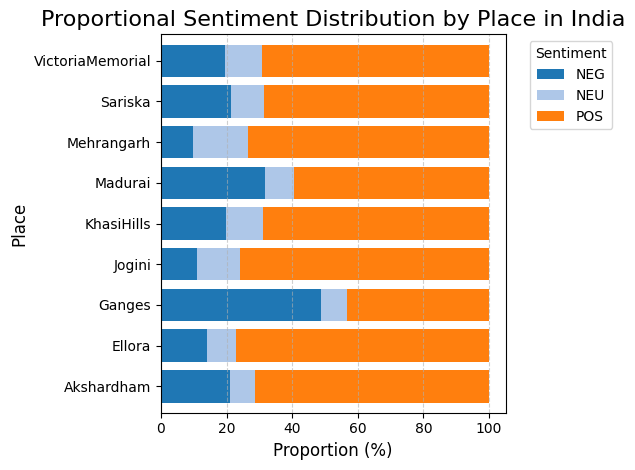

In [110]:
import matplotlib.pyplot as plt

# Filter data for country == 'India'
df_india = df[df['country'] == 'India']

# Calculate sentiment proportions by place for India
sentiment_by_place = df_india.groupby(['place', 'sentiment']).size().unstack(fill_value=0)
sentiment_proportions = sentiment_by_place.div(sentiment_by_place.sum(axis=1), axis=0) * 100

# Visualize as a horizontal stacked bar chart for India
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20.colors
sentiment_proportions.plot(kind='barh', stacked=True, color=colors, width=0.8)
plt.title('Proportional Sentiment Distribution by Place in India', fontsize=16)
plt.xlabel('Proportion (%)', fontsize=12)
plt.ylabel('Place', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Trend Analysis

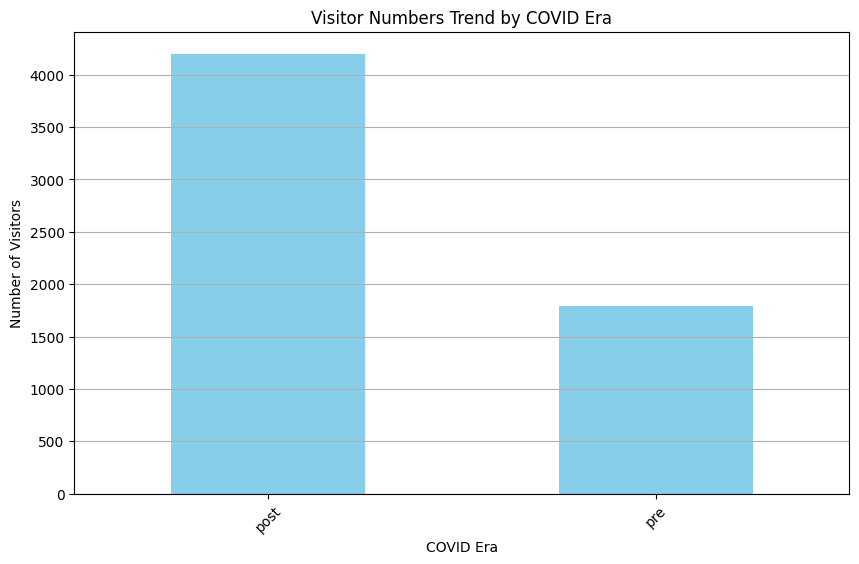

In [113]:
# Group by 'covid_era' and calculate the count of visitors during each phase
visitor_counts_by_covid_era = df.groupby('covid_era').size()

# Plotting the trend of visitor numbers during different phases of the COVID-19 pandemic
plt.figure(figsize=(10, 6))
visitor_counts_by_covid_era.plot(kind='bar', color='skyblue')
plt.title('Visitor Numbers Trend by COVID Era')
plt.xlabel('COVID Era')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#geographical trend

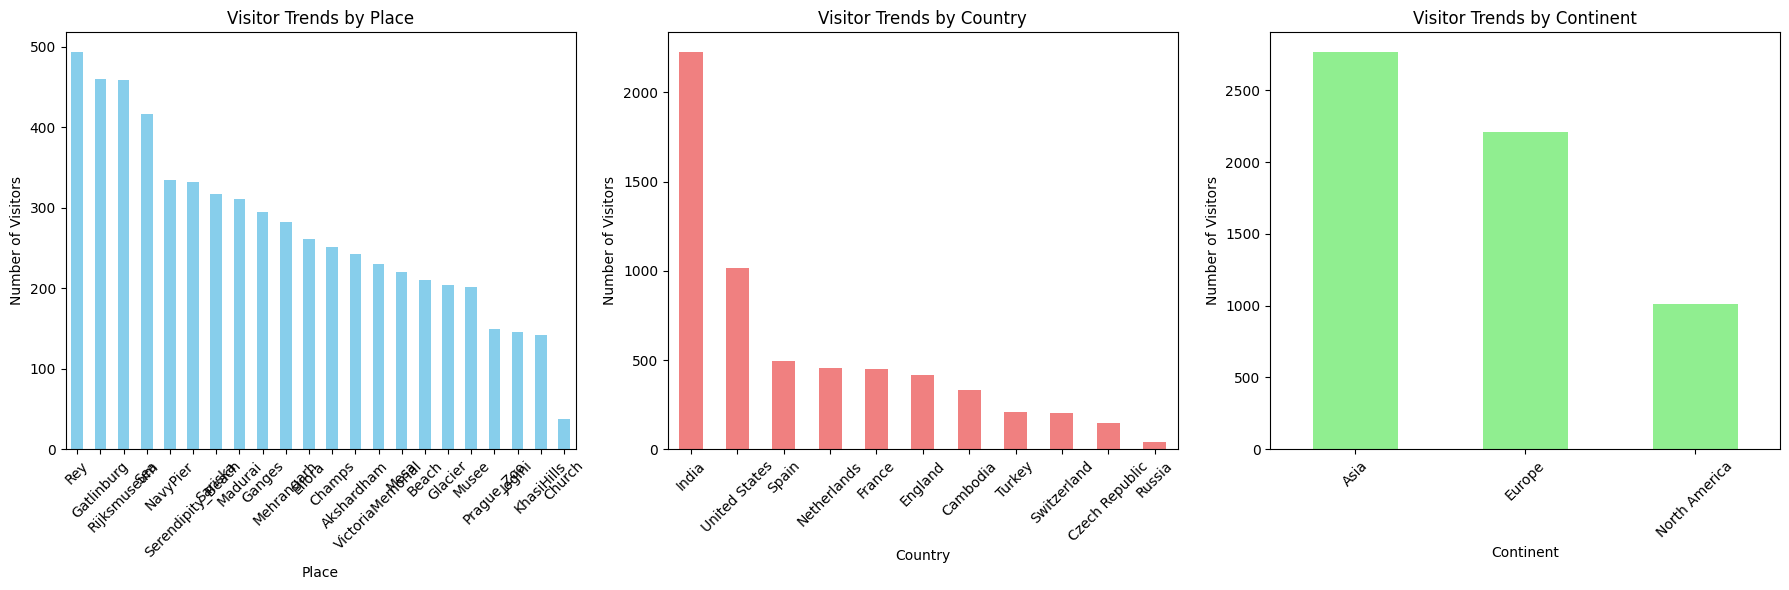

In [114]:
# Group by 'place', 'country', or 'continent' and calculate the count of visitors or sentiment scores
visitor_counts_by_place = df.groupby('place').size()
visitor_counts_by_country = df.groupby('country').size()
visitor_counts_by_continent = df.groupby('continent').size()

# Plotting the trends based on place, country, and continent
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
visitor_counts_by_place.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Visitor Trends by Place')
plt.xlabel('Place')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
visitor_counts_by_country.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Visitor Trends by Country')
plt.xlabel('Country')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
visitor_counts_by_continent.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Visitor Trends by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#Sentiment Analysis

In [121]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [122]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# Initialize the Sentiment Intensity Analyze

# Define a function to map 'pos', 'neg', and 'neu' to numerical sentiment scores
def get_sentiment_score(sentiment):
    if sentiment == 'POS':
        return 1  # Positive sentiment
    elif sentiment == 'NEG':
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Apply the sentiment score function to the 'sentiment' column and create a new column 'sentiment_score'
df['sentiment_score'] = df['sentiment'].apply(get_sentiment_score)

# Calculate compound sentiment scores using VADER
df['compound_score'] = df['sentiment'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize the sentiment scores or trends as needed

# Example: Print the first few rows of the DataFrame with sentiment scores
print(df[['sentiment', 'sentiment_score', 'compound_score']].head())

  sentiment  sentiment_score  compound_score
0       NEG               -1             0.0
1       NEG               -1             0.0
2       NEG               -1             0.0
3       NEG               -1             0.0
4       NEG               -1             0.0
